<a href="https://colab.research.google.com/github/Tulyakai/pisa_score_2015/blob/master/Pisa_score_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
print(pd.__version__)

1.1.5


In [ ]:
url = 'https://github.com/prasertcbs/basic-dataset/blob/master/PisaScore2015.xlsx?raw=true'
df = pd.read_excel(url,sheet_name=None)
mathNread = df['math'].merge(df['reading'], on='Country', how='inner', suffixes=('_math', '_reading'))


In [ ]:
pisa_all = mathNread.merge(df['sci'], on='Country', how='inner')
pisa_all

,Rank_math,Country,Maths,Rank_reading,Reading,Rank,Science
0,1,Singapore,564,1,535,1,556
1,2,Hong Kong,548,2,527,9,523
2,3,Macau,544,12,509,6,529
3,4,Taiwan,542,23,497,4,532
4,5,Japan,532,8,516,2,538
...,...,...,...,...,...,...,...
65,68,Macedonia,371,69,352,69,384
66,69,Tunisia,367,67,361,68,386
67,70,Kosovo,362,71,347,70,378
68,71,Algeria,360,70,350,71,376


In [ ]:
columns = [ 'rank_math', 'Country', 'Math', 'rank_reading', 'Reading','rank_science', 'Science']
pisa_all.columns = columns
pisa_all.set_index('Country')


,rank_math,Math,rank_reading,Reading,rank_science,Science
Country,,,,,,
Singapore,1,564,1,535,1,556
Hong Kong,2,548,2,527,9,523
Macau,3,544,12,509,6,529
Taiwan,4,542,23,497,4,532
Japan,5,532,8,516,2,538
...,...,...,...,...,...,...
Macedonia,68,371,69,352,69,384
Tunisia,69,367,67,361,68,386
Kosovo,70,362,71,347,70,378


In [ ]:
#Average ranking by summation every subject's rank and divided by number of subject
#Sort average rank by decending, then replace the number of ranking 
rank = [i+1 for i in pisa_all.index]
pisa_all['avg_rank'] = (pisa_all['rank_math']+pisa_all['rank_reading']+pisa_all['rank_science'])/3
pisa_all.sort_values('avg_rank', ascending=False)
pisa_all['avg_rank'] = rank
pisa_all

,rank_math,Country,Math,rank_reading,Reading,rank_science,Science,avg_rank
0,1,Singapore,564,1,535,1,556,1
1,2,Hong Kong,548,2,527,9,523,2
2,3,Macau,544,12,509,6,529,3
3,4,Taiwan,542,23,497,4,532,4
4,5,Japan,532,8,516,2,538,5
...,...,...,...,...,...,...,...,...
65,68,Macedonia,371,69,352,69,384,66
66,69,Tunisia,367,67,361,68,386,67
67,70,Kosovo,362,71,347,70,378,68
68,71,Algeria,360,70,350,71,376,69


In [ ]:
topten = pisa_all.nsmallest(10, 'avg_rank')
topten.set_index('Country')
topten = pd.melt(topten, id_vars=['Country','Math', 'Reading', 'Science'], value_name='rank')
topten

,Country,Math,Reading,Science,variable,rank
0,Singapore,564,535,556,rank_math,1
1,Hong Kong,548,527,523,rank_math,2
2,Macau,544,509,529,rank_math,3
3,Taiwan,542,497,532,rank_math,4
4,Japan,532,516,538,rank_math,5
5,China,531,494,518,rank_math,6
6,South Korea,524,517,516,rank_math,7
7,Switzerland,521,492,506,rank_math,8
8,Estonia,520,519,534,rank_math,9
9,Canada,516,527,528,rank_math,10


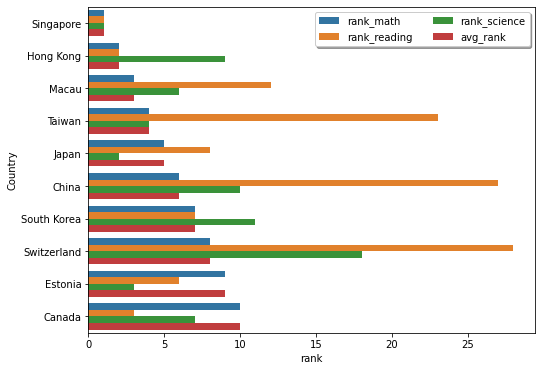

In [ ]:
plt.figure(figsize=(8,6))

ax = sns.barplot(data=topten, x='rank' ,y='Country',hue='variable')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=2, fancybox=True, shadow=True)

plt.show()